# <center> CREDIT CARD FRAUD TRANSACTION DETECTION </center>

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Importing the dataset
df = pd.read_csv("/Users/dheeraj_pittala/Downloads/Credit Card Fraud Detection Project/creditcard.csv")

In [4]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
rows, columns = df.shape
print("No.of rows in the datasets =", rows)
print("No.of columns in the datasets =", columns)

No.of rows in the datasets = 284807
No.of columns in the datasets = 31


In [6]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [7]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [8]:
#Finding the missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Dropping the duplicated values
df = df.drop_duplicates()

In [10]:
print(df.shape)

(283726, 31)


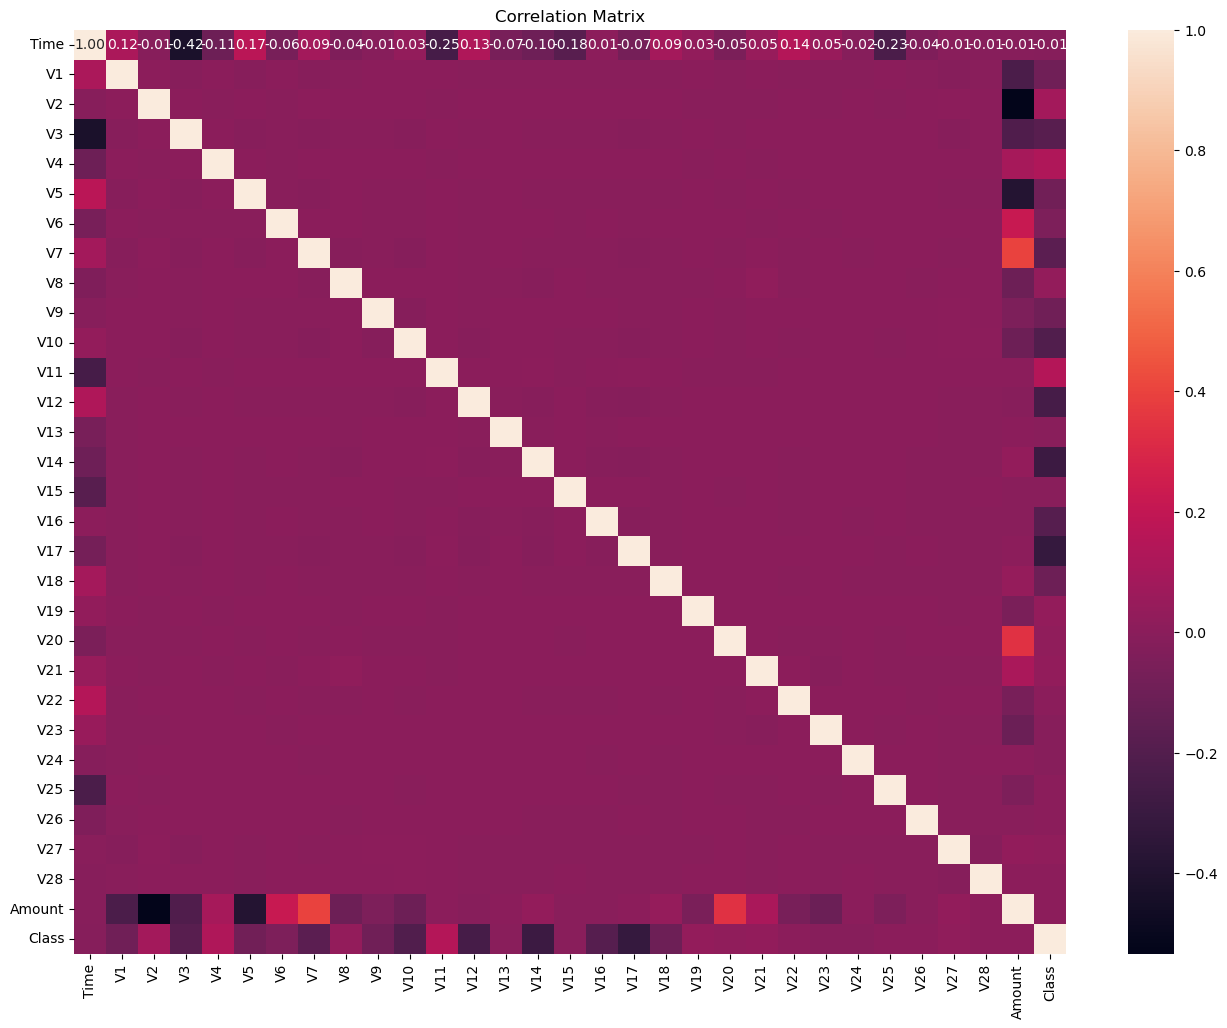

In [11]:
correlation_matrix = df.corr()

# Plotting correlation matrix heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

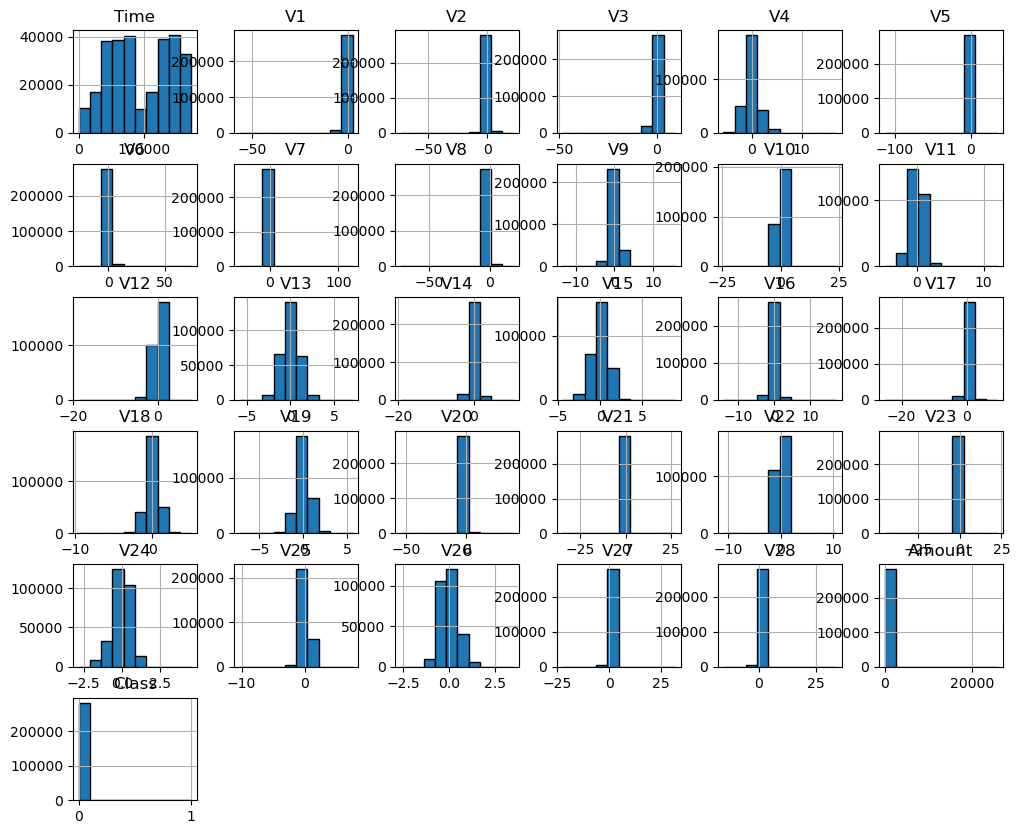

In [12]:
# Plotting histograms
df.hist(edgecolor= 'black',figsize=(12,10))
plt.show()

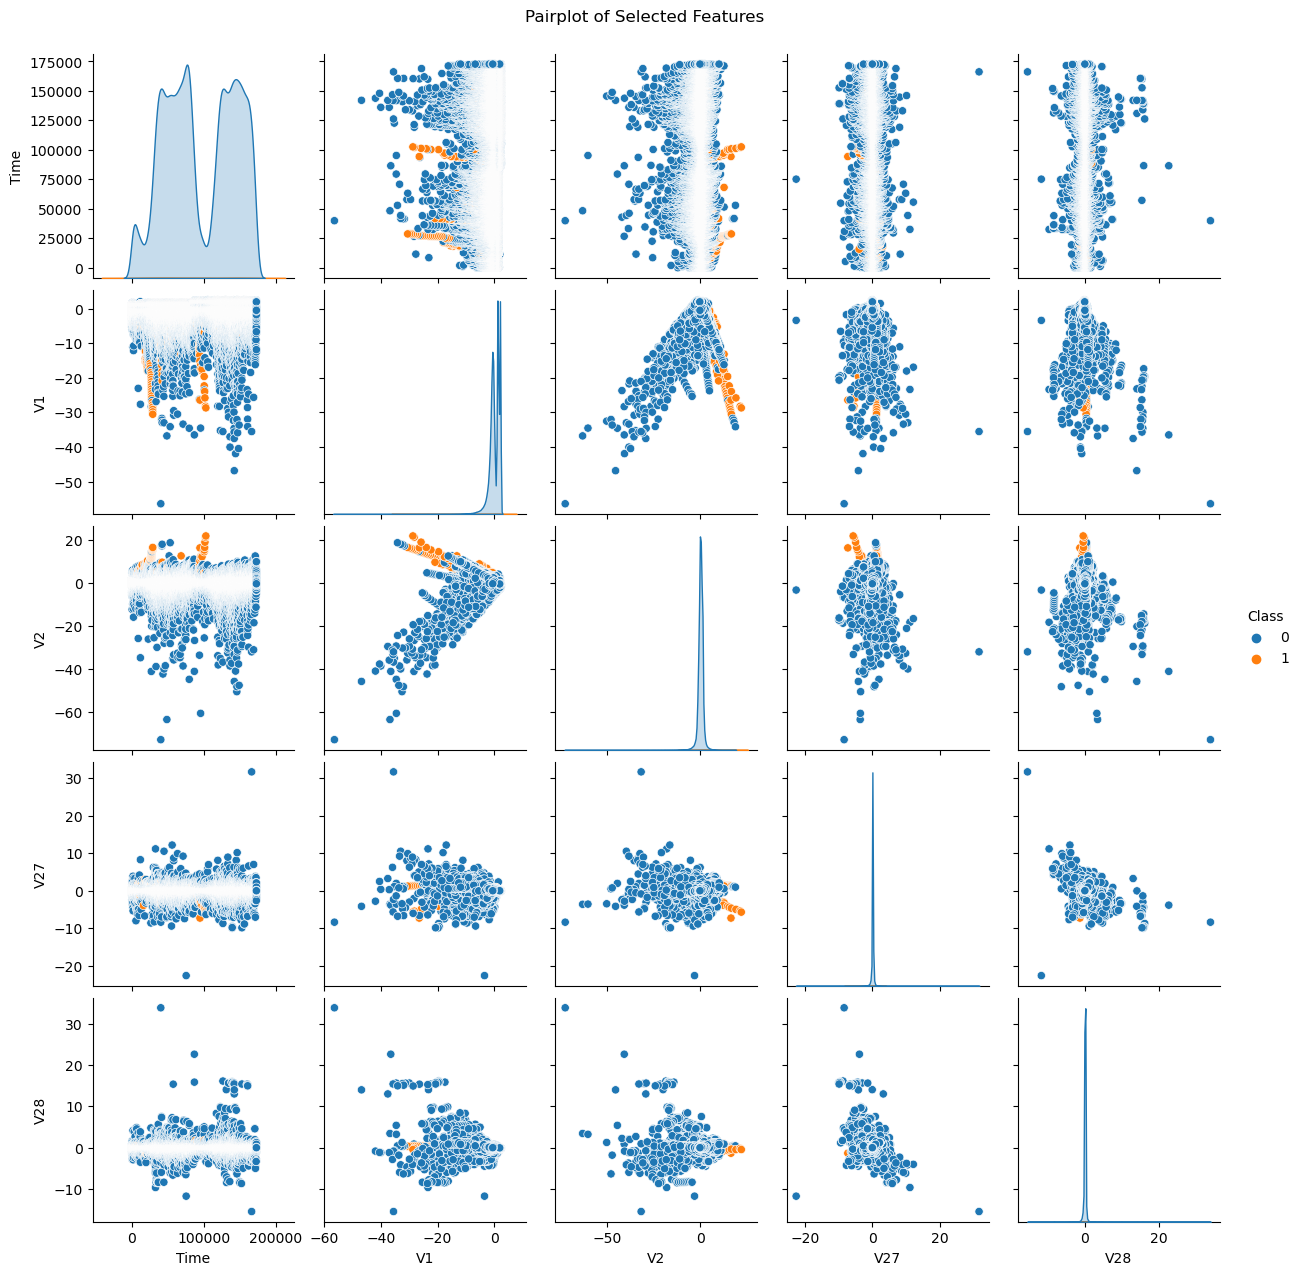

In [13]:
# Pairplot for selected features
selected_features = ['Time', 'V1', 'V2', 'V27', 'V28', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

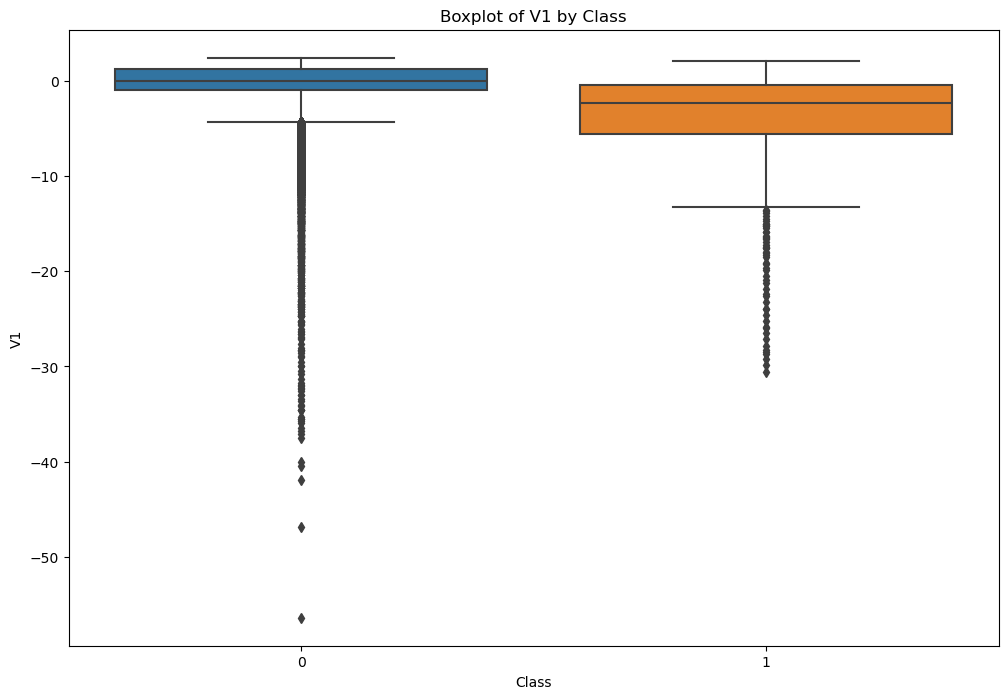

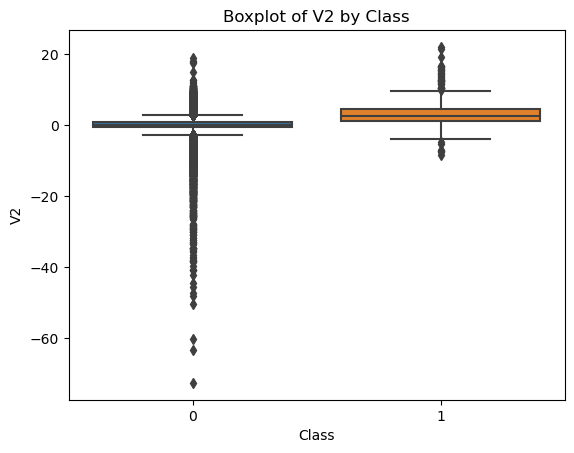

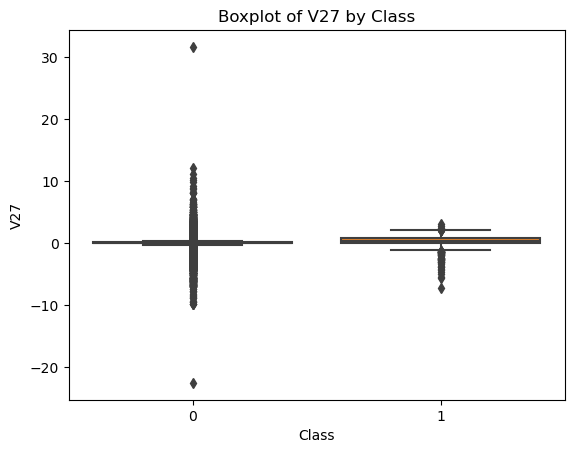

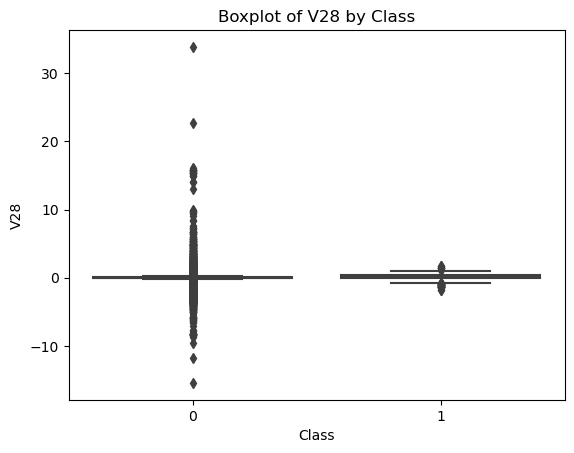

In [14]:
# Boxplot for selected features
plt.figure(figsize=(12, 8))
selected_boxplot_features = ['V1', 'V2', 'V27', 'V28']
for feature in selected_boxplot_features:
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')
    plt.show()

In [15]:
# Introducing the column Hour for interpreting hourly analysis
df['Hour'] = df['Time'].apply(lambda x : np.ceil(float(x)/3600) % 24)

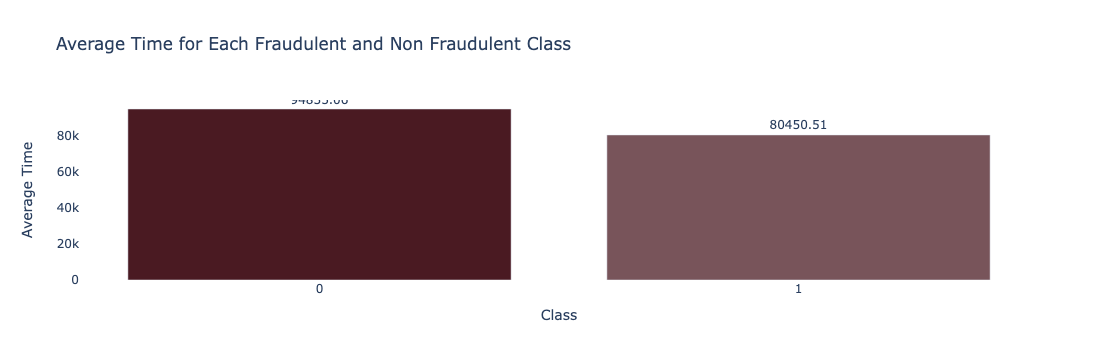

In [16]:
# Let's plot the Average Time for each class
average_time_per_class = df.groupby('Class')['Time'].mean().reset_index()
fig = px.bar(average_time_per_class, x='Class', y='Time', text = 'Time', title='Average Time for Each Fraudulent and Non Fraudulent Class')

fig.update_layout(xaxis_title='Class', yaxis_title='Average Time', plot_bgcolor='white' )
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside', marker_color=['#4A1A22', '#78545A'])
fig.update_xaxes(tickvals=[0, 1], ticktext=['0', '1'])
fig.show()

In [17]:
#Interpret the data for hourly distribution
hourly_transaction_counts = df.groupby(['Hour', 'Class']).size().unstack()
hourly_transaction = pd.DataFrame(hourly_transaction_counts)
hourly_transaction.head()

Class      0   1
Hour            
0.0    10868  17
1.0     7639   6
2.0     4200  10
3.0     3258  48
4.0     3471  17

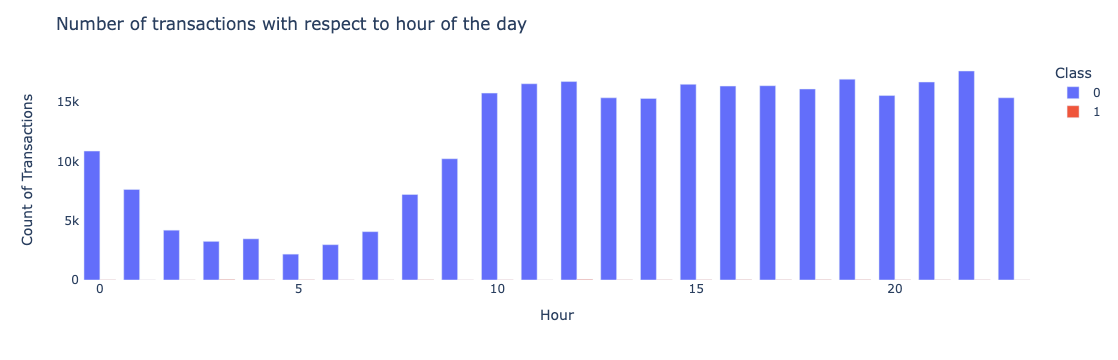

In [18]:
fig = px.bar(hourly_transaction, x = hourly_transaction.index, y = hourly_transaction.columns, barmode='group')
fig.update_layout(title_text="Number of transactions with respect to hour of the day", xaxis_title="Hour", yaxis_title="Count of Transactions", plot_bgcolor = 'white')
fig.show()

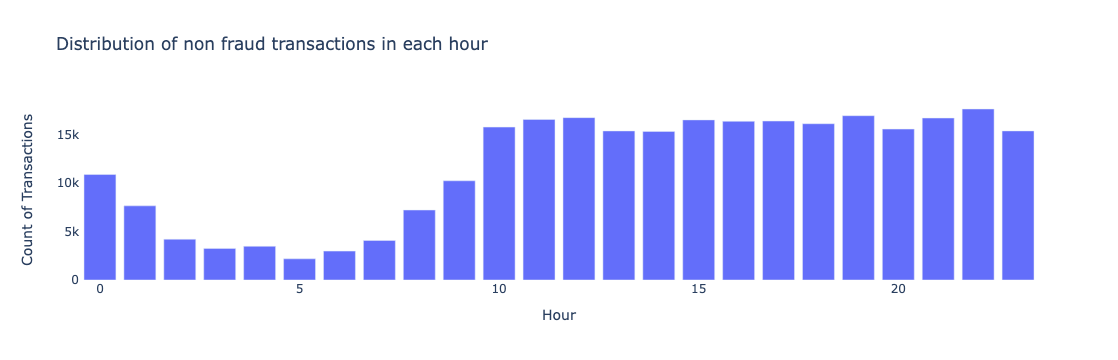

In [19]:
class_0_df = hourly_transaction[0].reset_index()
fig_class_0 = px.bar(class_0_df, x='Hour', y=0, title="Distribution of non fraud transactions in each hour", labels={'0': 'Count of Transactions'})
fig_class_0.update_layout(plot_bgcolor='white')
fig_class_0.show()

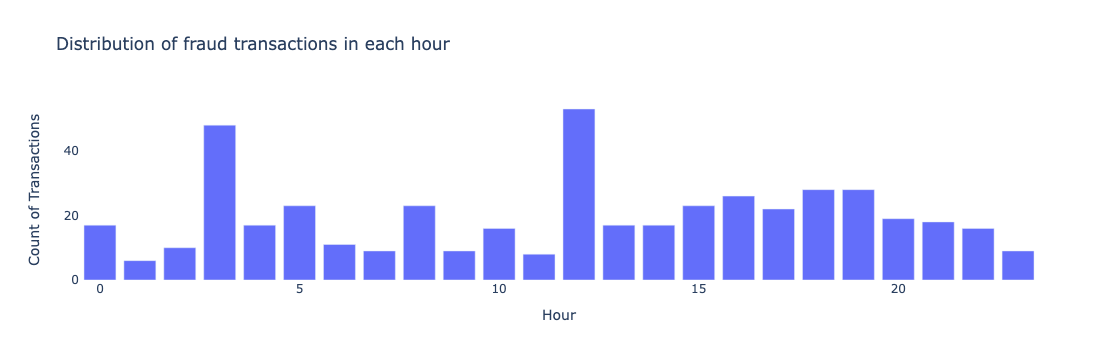

In [20]:
class_1_df = hourly_transaction[1].reset_index()
fig_class_1 = px.bar(class_1_df, x='Hour', y=1, title="Distribution of fraud transactions in each hour", labels={'1': 'Count of Transactions'})
fig_class_1.update_layout(plot_bgcolor='white')
fig_class_1.show()

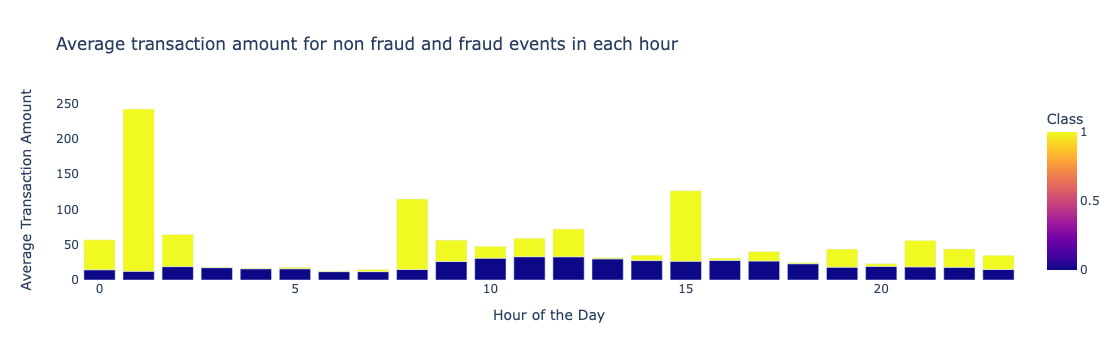

In [21]:
average_amount_per_hour_class = df.groupby(['Hour', 'Class'])['Amount'].median().reset_index()
fig = px.bar(average_amount_per_hour_class, x='Hour', y='Amount', color='Class', title='Average transaction amount for non fraud and fraud events in each hour', labels={'Hour': 'Hour of the Day', 'Amount': 'Average Transaction Amount', 'Class': 'Class'})
fig.update_layout(plot_bgcolor='white')
fig.show()

In [22]:
# Let's interpet the distribution of data on the basis of class
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [23]:
# separating the data for analysis

legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [24]:
print(legit.shape)
print(fraud.shape)

(283253, 32)
(473, 32)


In [25]:
# compare the values for both transactions
df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94835.058093  0.013439 -0.009829  0.012853 -0.010440  0.006769   
1      80450.513742 -4.498280  3.405965 -6.729599  4.472591 -2.957197   

             V6        V7        V8        V9  ...      V21       V22  \
Class                                          ...                      
0      0.001251  0.010447 -0.002448  0.002613  ... -0.00115 -0.000160   
1     -1.432518 -5.175912  0.953255 -2.522124  ...  0.46655  0.086639   

            V23       V24       V25       V26       V27       V28      Amount  \
Class                                                                           
0      0.000360  0.000393 -0.000301  0.000065  0.001409  0.000418   88.413575   
1     -0.096464 -0.106643  0.040615  0.050456  0.213774  0.078270  123.871860   

            Hour  
Class             
0      14.128804  
1      11.792812  

[2 rows x 31 columns]

In [26]:
# Since the dataset is highly imbalanced, we can use the resampling techniques which is either over sampling or under sampling.
# Here I wish to use under sampling 

legit_sample = legit.sample(n=473) #Randomly selects 473 samples

In [27]:
# Combining the two dataframes

new_df = pd.concat([legit_sample, fraud], axis=0)

In [28]:
new_df.head()

Time        V1        V2        V3        V4        V5        V6  \
115103   73748.0 -0.763301  0.925919  1.968837 -0.019843  0.608918 -0.806860   
165237  117298.0  2.097929 -1.348586 -1.939776 -1.882063  1.280414  3.674930   
271068  164395.0 -0.802629 -0.776690 -0.180920 -1.828586  1.254585  1.454481   
31410    36351.0 -0.923586 -1.845793  1.135250 -2.221648 -1.434052 -0.086216   
253432  156248.0 -0.903359  0.320590  0.280220 -1.211247  1.361323 -1.419527   

              V7        V8        V9  ...       V22       V23       V24  \
115103  1.359016 -0.678174 -0.218736  ...  0.154720 -0.278223  0.393418   
165237 -1.593877  0.946686 -0.033683  ...  0.889822  0.150823  0.742888   
271068  0.603174  0.392990 -1.415071  ...  1.077892  0.223045 -0.823452   
31410   1.011956 -0.837490 -1.727778  ...  0.622579  0.011912 -0.077482   
253432  1.474520 -0.353878 -0.288677  ...  0.873348 -0.229342 -0.027143   

             V25       V26       V27       V28  Amount  Class  Hour  
115103  0.123705 -0.664455 -0.486343 -0.318684   19.99      0  21.0  
165237 -0.120500 -0.070101  0.025209 -0.049614   39.00      0   9.0  
271068 -0.222000 -0.095005  0.160496  0.184449  170.00      0  22.0  
31410  -0.681087 -0.414584  0.057042 -0.407889  416.00      0  11.0  
253432  0.342284 -0.366684 -0.114349 -0.060146   85.25      0  20.0  

[5 rows x 32 columns]

In [29]:
new_df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [30]:
new_df.groupby('Class').mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      98503.837209 -0.045869  0.023448  0.064783 -0.017704 -0.095611   
1      80450.513742 -4.498280  3.405965 -6.729599  4.472591 -2.957197   

             V6        V7        V8        V9  ...       V21       V22  \
Class                                          ...                       
0      0.056024  0.125247  0.009310 -0.000100  ... -0.001018  0.041149   
1     -1.432518 -5.175912  0.953255 -2.522124  ...  0.466550  0.086639   

            V23       V24       V25       V26       V27       V28     Amount  \
Class                                                                          
0      0.010044 -0.014130 -0.022832 -0.012699  0.014204  0.002607  105.58518   
1     -0.096464 -0.106643  0.040615  0.050456  0.213774  0.078270  123.87186   

            Hour  
Class             
0      14.234672  
1      11.792812  

[2 rows x 31 columns]

In [31]:
# Choosing the features and target variable.
X = new_df.drop(columns=['Class', 'Hour'], axis=1)
Y = new_df['Class']

In [32]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
115103   73748.0 -0.763301  0.925919  1.968837 -0.019843  0.608918 -0.806860   
165237  117298.0  2.097929 -1.348586 -1.939776 -1.882063  1.280414  3.674930   
271068  164395.0 -0.802629 -0.776690 -0.180920 -1.828586  1.254585  1.454481   
31410    36351.0 -0.923586 -1.845793  1.135250 -2.221648 -1.434052 -0.086216   
253432  156248.0 -0.903359  0.320590  0.280220 -1.211247  1.361323 -1.419527   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [33]:
print(Y)

115103    0
165237    0
271068    0
31410     0
253432    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 946, dtype: int64


In [34]:
# Importing libraries for machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [35]:
#Training the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [36]:
# Standardizing the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#Initializing the models
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
#Fitting the Logistic Regression Model
lr.fit(X_train, Y_train)

LogisticRegression()

In [39]:
#Fitting the Random Forest Classifier Model
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Predictions using Logistic Regression

lr_pred = lr.predict(X_test)

# Predictions using Random Forest Classifier

rf_pred = rf.predict(X_test)

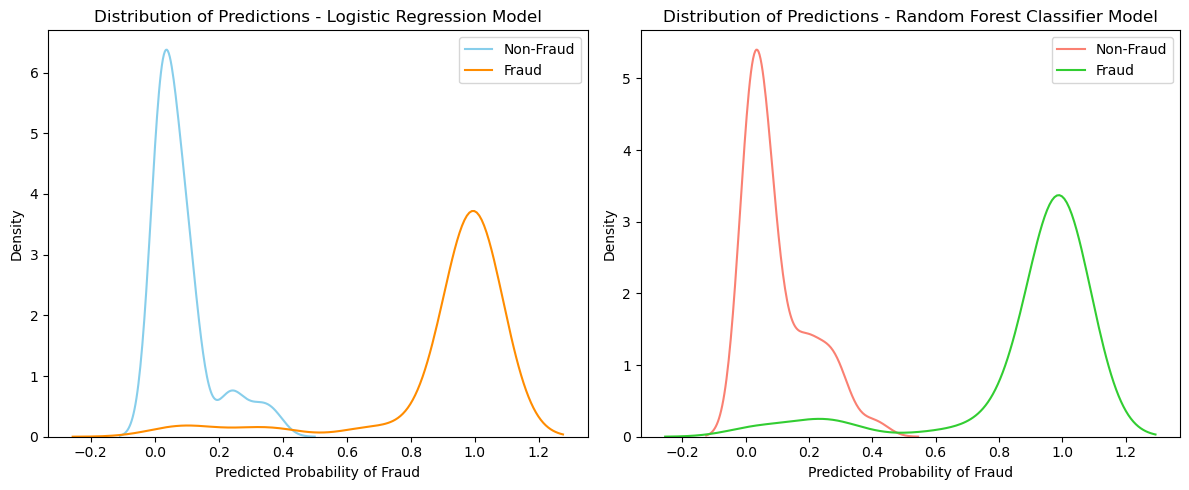

In [41]:
# Distribution of Predictions for Each Class
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(lr.predict_proba(X_test)[:, 1][Y_test == 0], label='Non-Fraud', color='skyblue')
sns.kdeplot(lr.predict_proba(X_test)[:, 1][Y_test == 1], label='Fraud', color='darkorange')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Density')
plt.title('Distribution of Predictions - Logistic Regression Model')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(rf.predict_proba(X_test)[:, 1][Y_test == 0], label='Non-Fraud', color='salmon')
sns.kdeplot(rf.predict_proba(X_test)[:, 1][Y_test == 1], label='Fraud', color='limegreen')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Density')
plt.title('Distribution of Predictions - Random Forest Classifier Model')
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
# Accuracy for Logistic Regression Model
lr_accuracy = accuracy_score(Y_test, lr_pred) * 100

# Accuracy for Random Forest Classifier Model
rf_accuracy = accuracy_score(Y_test, rf_pred) * 100

# Print accuracy scores
print("Accuracy for Logistic Regression Model:", lr_accuracy)
print("Accuracy for Random Forest Classifier Model:", rf_accuracy)

Accuracy for Logistic Regression Model: 95.78947368421052
Accuracy for Random Forest Classifier Model: 95.26315789473684


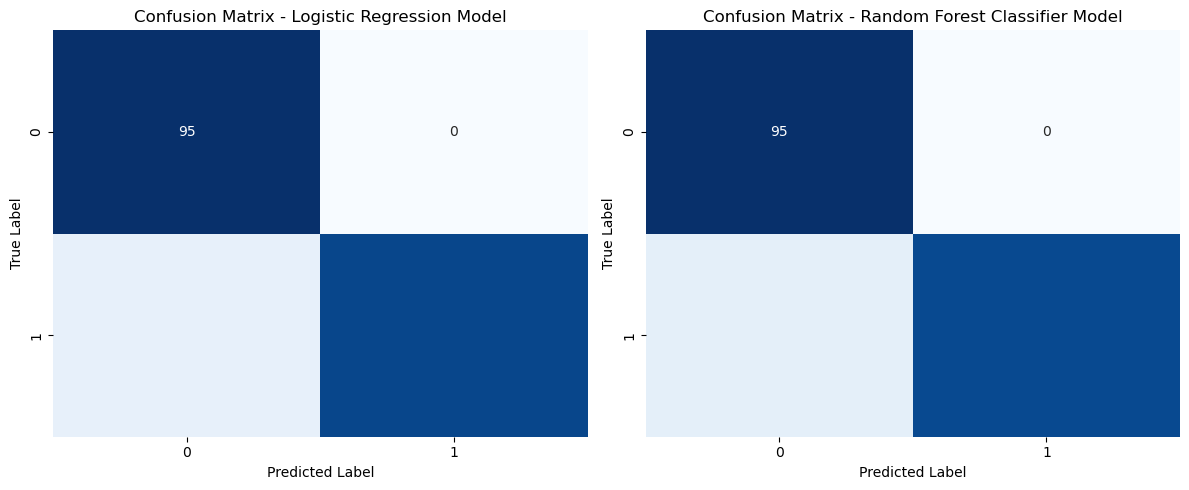

In [43]:
# Visualize results for Logistic Regression Model
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_test, lr_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(Y_test, rf_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

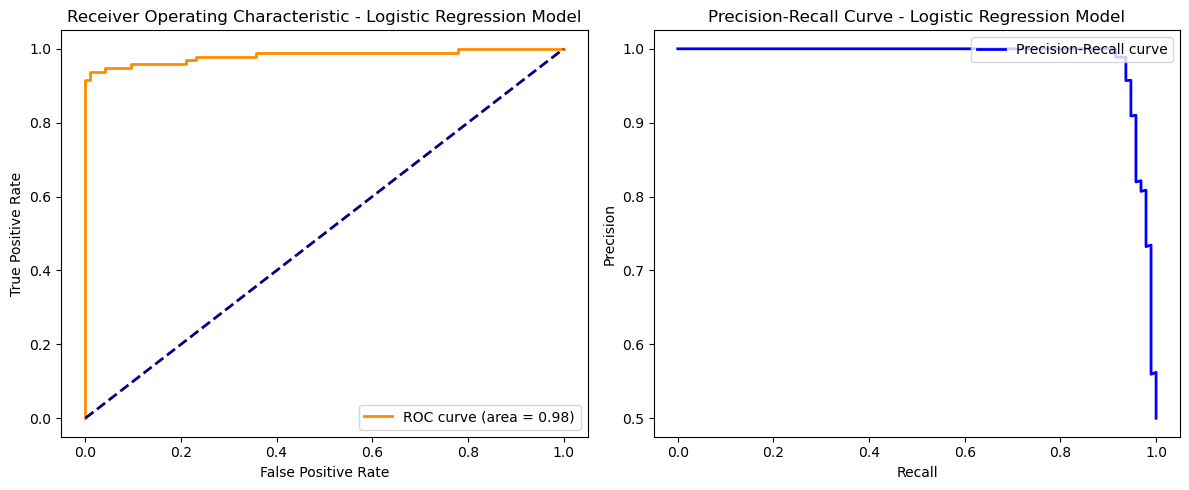

In [44]:
# ROC curve for Logistic Regression Model
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test, lr.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Precision-Recall curve for Logistic Regression Model
precision_logreg, recall_logreg, _ = precision_recall_curve(Y_test, lr.predict_proba(X_test)[:, 1])

# Plot ROC curve and Precision-Recall curve for Logistic Regression Model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_logreg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression Model')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall_logreg, precision_logreg, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression Model')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

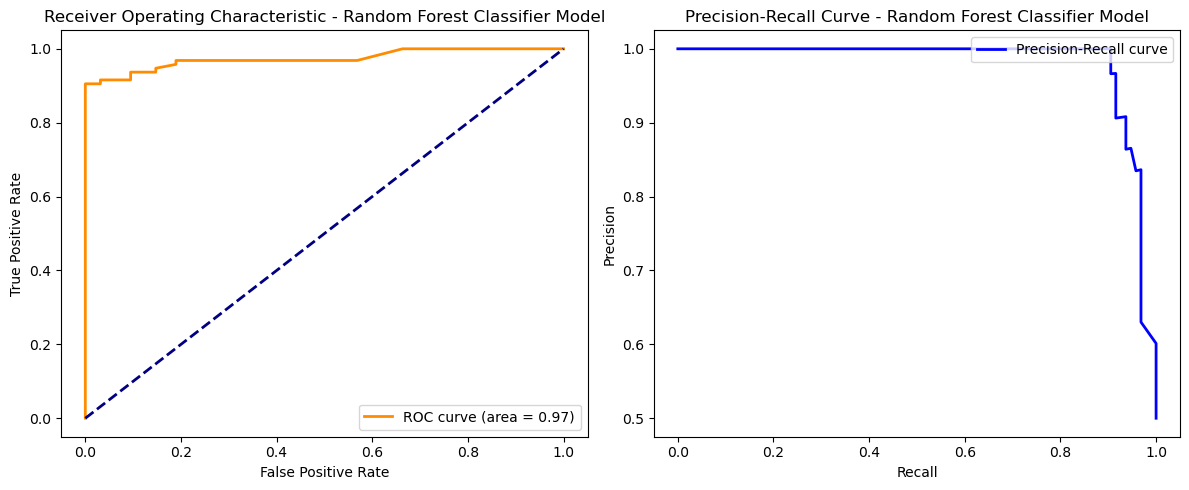

In [45]:
# ROC curve for Random Forest Classifier Model
fpr_rf, tpr_rf, _ = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Precision-Recall curve for Random Forest Classifier Model
precision_rf, recall_rf, _ = precision_recall_curve(Y_test, rf.predict_proba(X_test)[:, 1])

# Plot ROC curve and Precision-Recall curve for Random Forest Classifier Model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest Classifier Model')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest Classifier Model')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

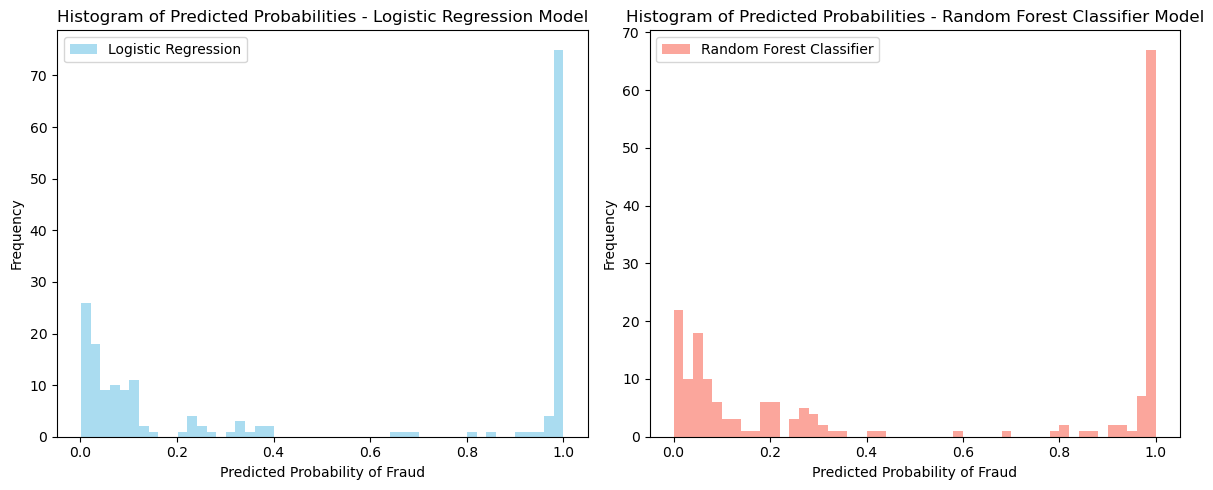

In [46]:
# Histogram of Predicted Probabilities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(lr.predict_proba(X_test)[:, 1], bins=50, color='skyblue', alpha=0.7, label='Logistic Regression')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities - Logistic Regression Model')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(rf.predict_proba(X_test)[:, 1], bins=50, color='salmon', alpha=0.7, label='Random Forest Classifier')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities - Random Forest Classifier Model')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusion: